In [88]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.utils import to_categorical

In [89]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (60000, 28, 28), y_train.shape : (60000,)
x_test.shape : (10000, 28, 28), y_test.shape : (10000,)


<function matplotlib.pyplot.show>

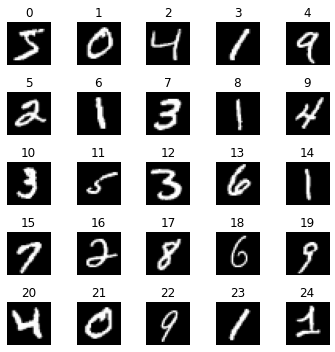

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    plt.title(index)

plt.tight_layout()
plt.show

In [91]:
# normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f'x_train.max : {x_train.max()}, x_train.min : {x_train.min()}')
print(f'x_test.max : {x_test.max()}, x_test.min : {x_test.min()}')


x_train.max : 1.0, x_train.min : 0.0
x_test.max : 1.0, x_test.min : 0.0


In [92]:
# shuffle

s = np.arange(len(x_train))

np.random.shuffle(s)

x_train = x_train[s]

In [93]:
# # ond hot encoding
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# print(f'train label : {y_train[0]}, train value : {np.argmax(y_train)}')
# print(f'test label : {y_test[0]}, test value : {np.argmax(y_test)}')

In [94]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [95]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [96]:
hist = model.fit(x_train,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 11s 7ms/step - loss: 2.3065 - accuracy: 0.1104 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3014 - accuracy: 0.1136 - val_loss: 2.3025 - val_accuracy: 0.1063
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3049 - val_accuracy: 0.1052
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3005 - accuracy: 0.1147 - val_loss: 2.3029 - val_accuracy: 0.1071
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2990 - accuracy: 0.1176 - val_loss: 2.3044 - val_accuracy: 0.1053
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2968 - accuracy: 0.1182 - val_loss: 2.3063 - val_accuracy: 0.1047
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2943 - accuracy: 0.1211 - val_loss: 2.3098 - val_accuracy

In [97]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4997 - accuracy: 0.1115


[2.499718189239502, 0.11150000244379044]

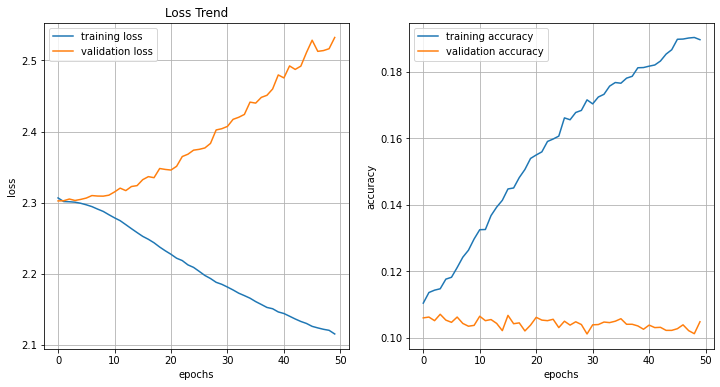

In [98]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

## 0.5


In [99]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [100]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [101]:
hist = model.fit(x_train,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3065 - accuracy: 0.1104 - val_loss: 2.3027 - val_accuracy: 0.1063
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3016 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3013 - accuracy: 0.1135 - val_loss: 2.3023 - val_accuracy: 0.1053
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3013 - accuracy: 0.1146 - val_loss: 2.3024 - val_accuracy: 0.1059
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3012 - accuracy: 0.1141 - val_loss: 2.3022 - val_accuracy: 0.1055
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3027 - val_accuracy: 0.1048
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3004 - accuracy: 0.1148 - val_loss: 2.3038 - val_accuracy:

In [102]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3357 - accuracy: 0.1179


[2.335689067840576, 0.11789999902248383]

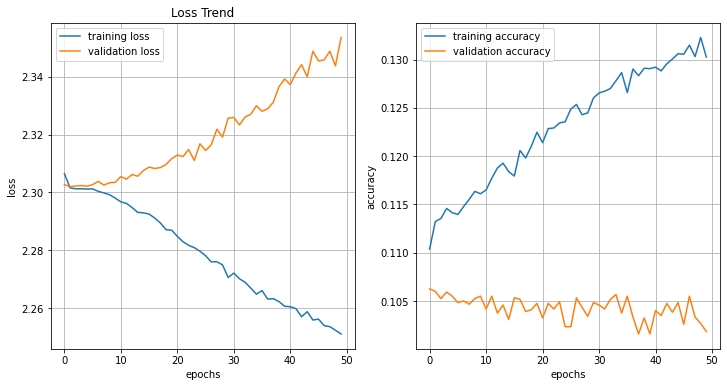

In [103]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

0.75


In [104]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(10, activation='softmax'))

In [105]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [106]:
hist = model.fit(x_train,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3076 - accuracy: 0.1120 - val_loss: 2.3022 - val_accuracy: 0.1056
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3018 - accuracy: 0.1146 - val_loss: 2.3023 - val_accuracy: 0.1059
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3018 - accuracy: 0.1137 - val_loss: 2.3023 - val_accuracy: 0.1053
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3015 - accuracy: 0.1145 - val_loss: 2.3020 - val_accuracy: 0.1062
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1057
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3022 - val_accuracy: 0.1061
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1138 - val_loss: 2.3020 - val_accuracy:

In [107]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3015 - accuracy: 0.1126


[2.301468849182129, 0.11259999871253967]

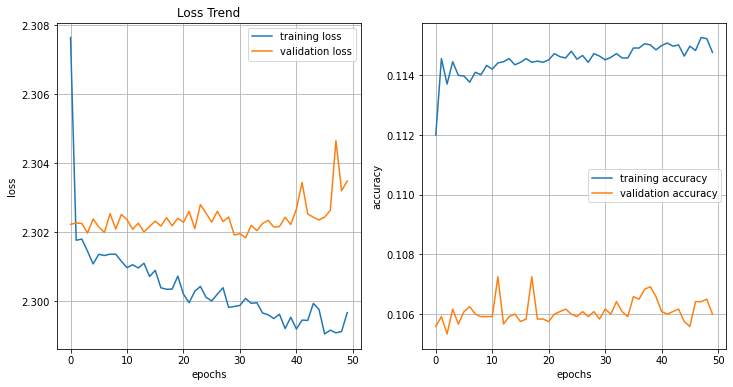

In [108]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()